In [1]:
from IPython.core.display import display, HTML, clear_output
display(HTML("<style>.container { width:100% !important; }</style>"))

%load_ext autoreload
%autoreload 2

In [2]:
import my_cadet_utils as cad_utils
from cadet_imports import *

# Langmuir isotherm

In [3]:
linear_gradient_model = cad_utils.get_cadet_template(n_units=2)
n_comp = 2
Q = 1e-3

# INLET
linear_gradient_model.root.input.model.unit_000.unit_type = 'INLET'
linear_gradient_model.root.input.model.unit_000.ncomp = n_comp
linear_gradient_model.root.input.model.unit_000.inlet_type = 'PIECEWISE_CUBIC_POLY'

# CSTR
linear_gradient_model.root.input.model.unit_001.unit_type = 'CSTR'
linear_gradient_model.root.input.model.unit_001.use_analytic_jacobian = 0

linear_gradient_model.root.input.model.unit_001.ncomp = n_comp
linear_gradient_model.root.input.model.unit_001.init_volume = 1e-3
linear_gradient_model.root.input.model.unit_001.porosity = 0.694
linear_gradient_model.root.input.model.unit_001.init_c = n_comp*[0]
linear_gradient_model.root.input.model.unit_001.init_q = n_comp*[0]
linear_gradient_model.root.input.model.unit_001.flow_rate_filter = Q

# Sections and Switches
linear_gradient_model.root.input.solver.sections.nsec = 1
linear_gradient_model.root.input.solver.sections.section_times = [0.0, 200]

linear_gradient_model.root.input.model.unit_000.sec_000.const_coeff = [0.0, 0]
linear_gradient_model.root.input.model.unit_000.sec_000.lin_coeff = [0, 1]

linear_gradient_model.root.input.model.connections.nswitches = 1
linear_gradient_model.root.input.model.connections.switch_000.section = 0
linear_gradient_model.root.input.model.connections.switch_000.connections = [0, 1, -1, -1, Q]

adsorption_model = 'MULTI_COMPONENT_LANGMUIR'
adsorption_parameters = Dict()
adsorption_parameters.is_kinetic = False
adsorption_parameters.mcl_ka = [0, 1.0e2]
adsorption_parameters.mcl_kd = [0, 1]
adsorption_parameters.mcl_qmax = [0, 100.0]

linear_gradient_model.root.input.model.unit_001.nbound = [0, 1]
linear_gradient_model.root.input.model.unit_001.adsorption_model = adsorption_model
linear_gradient_model.root.input.model.unit_001.adsorption = adsorption_parameters

cad_utils.run_simulation(linear_gradient_model, 'test_case')
solution_bulk  = linear_gradient_model.root.output.solution.unit_001.solution_bulk
solution_solid = linear_gradient_model.root.output.solution.unit_001.solution_solid

Simulation completed successfully


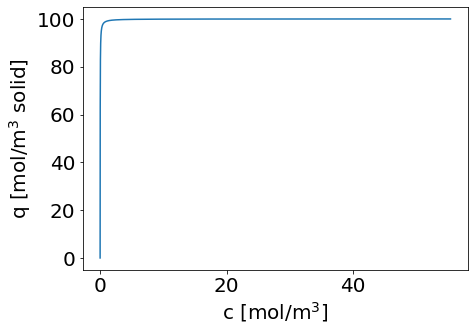

In [5]:
fig, ax = plt.subplots()
params  = {'font.weight':'normal', 'font.size':20, 'figure.autolayout':True}
plt.rcParams.update(params)
plt.xlabel('c [mol/m$^3$]')
plt.ylabel('q [mol/m$^3$ solid]')
fig.set_size_inches(7, 5, forward=True)
# ax.set_xlim(-0.1, 5)

ax.plot(solution_bulk[:,1], solution_solid[:,0])

In [12]:
linear_gradient_model.root.output.solution.unit_001.keys()

dict_keys(['solution_bulk', 'solution_inlet', 'solution_outlet', 'solution_solid', 'solution_volume'])

# Loading simulation

In [10]:
linear_gradient_model = Cadet()
linear_gradient_model.filename = os.path.join(Path().absolute(), 'temp_files', 'test_case.h5')
linear_gradient_model.load()

solution_bulk  = linear_gradient_model.root.output.solution.unit_001.solution_bulk
solution_solid = linear_gradient_model.root.output.solution.unit_001.solution_solid

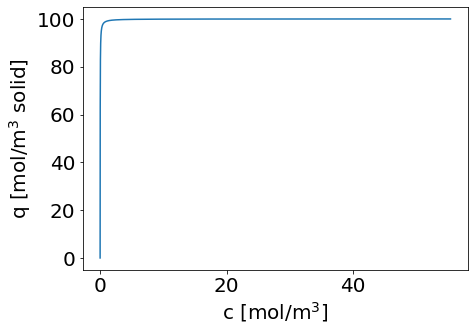

In [11]:
fig, ax = plt.subplots()
params  = {'font.weight':'normal', 'font.size':20, 'figure.autolayout':True}
plt.rcParams.update(params)
plt.xlabel('c [mol/m$^3$]')
plt.ylabel('q [mol/m$^3$ solid]')
fig.set_size_inches(7, 5, forward=True)
# ax.set_xlim(-0.1, 5)

ax.plot(solution_bulk[:,1], solution_solid[:,0])

In [19]:
from addict import Dict
import h5py
import cadet

In [15]:
with h5py.File('./temp_files/test_case.h5', 'r') as h5file:
    data = Dict(cadet.recursively_load(h5file, '/'))

AttributeError: module 'cadet' has no attribute 'recursively_load'